# Econ 441B Week 4 Assignment
# Richard Grigorian (UID: 505-088-797)

## 0. Import the Credit Card Fraud Data From CCLE

In [17]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 1. Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [31]:
from sklearn.model_selection import train_test_split

# Same feature selection as week 3
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
# Time (month) variable --> Indicator
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.month_name() for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category", "time_var"]).drop(["trans_date_trans_time","is_fraud"], axis = 1)
y = df["is_fraud"]
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.3
)

## 2. Make three sets of training data (Oversample, Undersample and SMOTE)

In [16]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Oversample
ros = RandomUnderSampler(random_state=0)
over_X, over_y = ros.fit_resample(X_train, y_train)
# Undersample
rus = RandomUnderSampler(random_state=0)
under_X, under_y = rus.fit_resample(X_train, y_train)
# SMOTE
rSMOTEs = SMOTE()
smote_X, smote_y = rSMOTEs.fit_resample(X_train, y_train)

## 3. Train three logistic regression models.

In [19]:
from sklearn.linear_model import LogisticRegression
# logit models using oversample, undersample, and smote data
over_log = LogisticRegression().fit(over_X,over_y)
under_log = LogisticRegression().fit(under_X,under_y)
smote_log = LogisticRegression().fit(smote_X,smote_y)

## 4. Test the three models

[Text(0.5, 1.0, 'Confusion Matrix (OverSample)')]

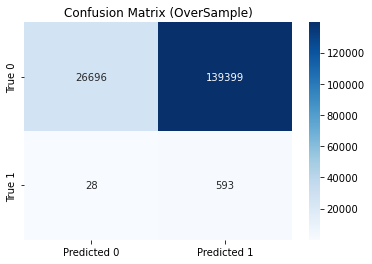

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Testing the three models
over_pred = over_log.predict(X_test)
under_pred = under_log.predict(X_test)
smote_pred = smote_log.predict(X_test)

pred_df = pd.DataFrame(y_test).reset_index()
pred_df = pred_df.drop(columns="index")
pred_df["over_pred"] = over_pred 
pred_df["under_pred"] = under_pred
pred_df["smote_pred"] = smote_pred
pred_df.head()

# Confusion Matricies
over_cm = confusion_matrix(y_test, over_pred)
under_cm = confusion_matrix(y_test, under_pred)
smote_cm = confusion_matrix(y_test, smote_pred)
sns.heatmap(over_cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (OverSample)'
            )

[Text(0.5, 1.0, 'Confusion Matrix (UnderSample)')]

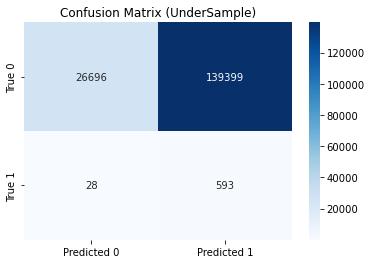

In [47]:
sns.heatmap(under_cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (UnderSample)'
            )

[Text(0.5, 1.0, 'Confusion Matrix (SMOTE)')]

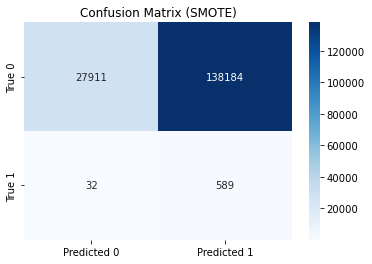

In [48]:
sns.heatmap(smote_cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (SMOTE)'
            )

## 5. Which performed best in Out of Sample metrics?

We will consider overall accuracy and false negative rates for our two out of sample metrics. Accuracy is a common metric, but we are more interested in false negatives. These are transactions we predict to be not fraudulent but actually are fraud. This seems like an important problem.

In [90]:
# Function for getting all relevant measures
def measures(confusion_matrix):
    FP = confusion_matrix[0][0] 
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]
    TN = confusion_matrix[0][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print('Accuracy: ', ACC)
    print('False Negative Rate: ', FNR)

In [99]:
# Over Sample
print("| Over Sampling |")
measures(over_cm)
# Under Sample
print("| Under Sampling |")
measures(under_cm)
# SMOTE
print("| SMOTE |")
measures(smote_cm)

| Over Sampling |
Accuracy:  0.8397034477794573
False Negative Rate:  0.04508856682769726
| Under Sampling |
Accuracy:  0.8397034477794573
False Negative Rate:  0.04508856682769726
| SMOTE |
Accuracy:  0.8323916120828235
False Negative Rate:  0.05152979066022544


From the above metrics, it seems that both the **over sampling** and **under sampling** methods achieved the same False Negative Rate and Accuracy which were both higher than that of SMOTE. Hence, either over sampling or under sampling performed equally well and better than SMOTE.

## 6. Pick two features and plot the two classes before and after SMOTE.

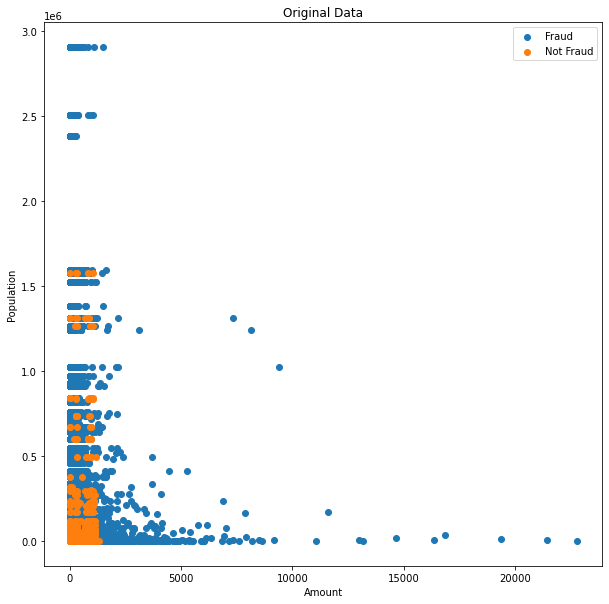

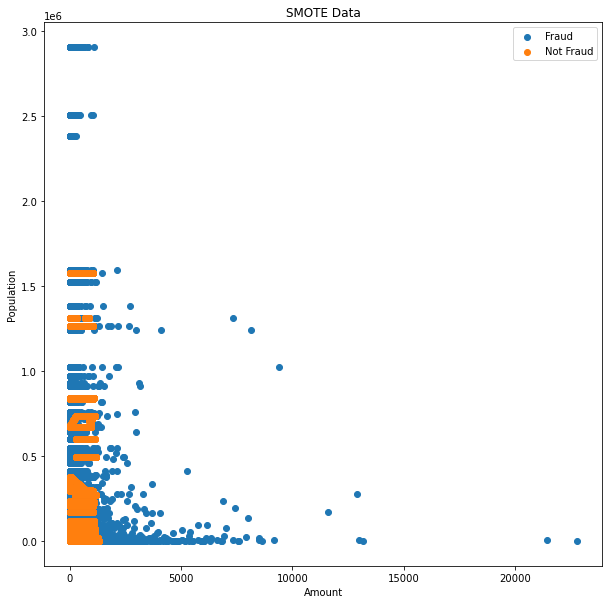

In [112]:
# Raw (original) data
raw_temp = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(10,10))
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"],
            raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"],
            raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.title("Original Data")
plt.show()

# SMOTE
smote_temp = pd.concat([smote_X, smote_y], axis=1)
plt.figure(figsize=(10,10))
plt.scatter(smote_temp[smote_temp["is_fraud"] == 0]["amt"],
            smote_temp[smote_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(smote_temp[smote_temp["is_fraud"] == 1]["amt"],
            smote_temp[smote_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.title("SMOTE Data")
plt.show()


Notice the effect of SMOTE. Namely, we now have a balance data set. In particular, SMOTE makes this clearer than other methods since it takes nearest neighbor-like averages. Hence, the amount of orange dots is visibly greater than that of the original plot.